In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("InnerJoined_ResultsV2.csv")

columns = df.columns.tolist()

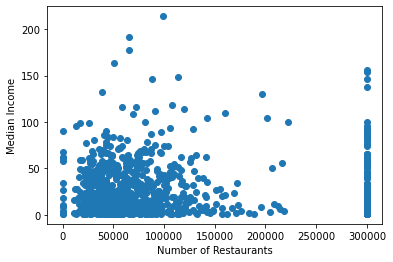

In [2]:
plt.scatter(df["median"], df["count"])
plt.xlabel('Number of Restaurants')
plt.ylabel('Median Income')
plt.show()

In [3]:
X = df["count"].values.reshape(-1, 1)

In [4]:
y = df["median"]

In [5]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [6]:
y_pred = model.predict(X)
print(y_pred.shape)

(945,)


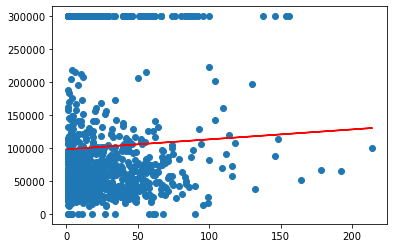

[150.85486846]
98046.2566762438


In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

print(model.coef_)
print(model.intercept_)

#Our y=mx+b slope equation is Median Income = 98046 + 151*Number of Restaurants

In [8]:
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
from keras.models import load_model
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = classifier.predict(X_test)
results=pd.DataFrame({"Prediction":y_pred, "Actual":y_test}).reset_index(drop=True)
results.head(30)

,Prediction,Actual
0,103738.114106,25700
1,113528.083564,300000
2,100868.640299,33741
3,107620.343374,109102
4,101881.395760,0
5,100193.469992,20792
6,108801.891412,300000
7,128888.208058,65963
8,106438.795335,300000
9,99011.921953,300000


In [33]:
#where our below errors stem from
print("y_pred = ", type(y_pred))
print("y_test = ",type(y_test))

y_pred =  <class 'numpy.ndarray'>
y_test =  <class 'pandas.core.series.Series'>


In [22]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
#can't handle a mix of continuous and multi class Classification metrics? Should all be continuous

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [21]:
print(accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets